In [5]:
!pip install pandas_profiling

  Using cached pandas_profiling-3.2.0-py2.py3-none-any.whl (262 kB)
  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached pydantic-1.9.1-cp39-cp39-win_amd64.whl (2.0 MB)
  Using cached phik-0.12.2-cp39-cp39-win_amd64.whl (685 kB)
  Using cached ImageHash-4.2.1-py2.py3-none-any.whl


In [8]:
%matplotlib inline  
# To make data visualisations display in Jupyter Notebooks 
import numpy as np   # linear algebra
import pandas as pd  # Data processing, Input & Output load
import matplotlib.pyplot as plt # Visuvalization & plotting
import datetime  
import joblib  #Joblib is a set of tools to provide lightweight pipelining in Python (Avoid computing twice the same thing)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, make_scorer, accuracy_score, roc_curve, confusion_matrix, classification_report
#import pandas_profiling as pp   # simple and fast exploratory data analysis of a Pandas Datafram

import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.5f' % x) # scientific number to number


## Importing Data

In [9]:
# Read-in the dataset
Insurance_Data = pd.read_csv(r'C:\Users\SNEHA\Desktop\Machine learning\Ridge and lasso regresssion\carInsurance_data.csv')
print('Train Data Shape - ', Insurance_Data.shape)
Insurance_Data.head()

Train Data Shape -  (4000, 19)


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


We have 4000 customers of data with 19 columns to train the model and 1000 customers to test our model on. Here we will use the train and test data differently to train and test the model.

### Lets check the data type

In [10]:
# What type of values are stored in the columns?
Insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

## Lets Generate a Data Profiling Report

pp.ProfileReport(Insurance_Data)

# EDA

### Let's check the summary fo data 

In [11]:
# Let's look at some statistical information about our dataframe.
Insurance_Data.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000
mean,2000.50000,41.21475,0.01450,1532.93725,0.49275,0.13300,15.72125,2.60725,48.70650,0.71750,0.40100
std,1154.84487,11.55019,0.11955,3511.45249,0.50001,0.33962,8.42531,3.06420,106.68538,2.07865,0.49016
min,1.00000,18.00000,0.00000,-3058.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,0.00000,0.00000
25%,1000.75000,32.00000,0.00000,111.00000,0.00000,0.00000,8.00000,1.00000,-1.00000,0.00000,0.00000
50%,2000.50000,39.00000,0.00000,551.50000,0.00000,0.00000,16.00000,2.00000,-1.00000,0.00000,0.00000
75%,3000.25000,49.00000,0.00000,1619.00000,1.00000,0.00000,22.00000,3.00000,-1.00000,0.00000,1.00000
max,4000.00000,95.00000,1.00000,98417.00000,1.00000,1.00000,31.00000,43.00000,854.00000,58.00000,1.00000


In [12]:
# This is how we can get summary for the categorical data
Insurance_Data.describe(include=np.object) 

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,17:11:04,10:22:30
freq,893,2304,1988,2831,1049,437,3,3


### Univariate Analysis

**Lets analyse the data w.r.t our Target variable**

In [13]:
Target = 'CarInsurance'
pd.crosstab(Insurance_Data[Target], columns='N', normalize=True) # normalize=True means calculate %

col_0,N
CarInsurance,
0,0.59900
1,0.40100


**The data seems to be quiet good as we have approx. 40% of 1's in our data**

# Visualising Data - Bivariate Analysis

In [14]:
# Lets drop columns which we will not use
num_cols = Insurance_Data.drop(['Id', 'CarInsurance'],axis=1).select_dtypes(include=[np.number]).columns.tolist()
non_num_cols = Insurance_Data.drop(['CallStart', 'CallEnd'],axis=1).select_dtypes(exclude=[np.number]).columns.tolist()


In [15]:
print('Numeric Columns \n', num_cols)
print('Non-Numeric Columns \n', non_num_cols)

Numeric Columns 
 ['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']
Non-Numeric Columns 
 ['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']


In [16]:
pd.crosstab(Insurance_Data.CarLoan,Insurance_Data[Target])

CarInsurance,0,1
CarLoan,,
0,2016,1452
1,380,152


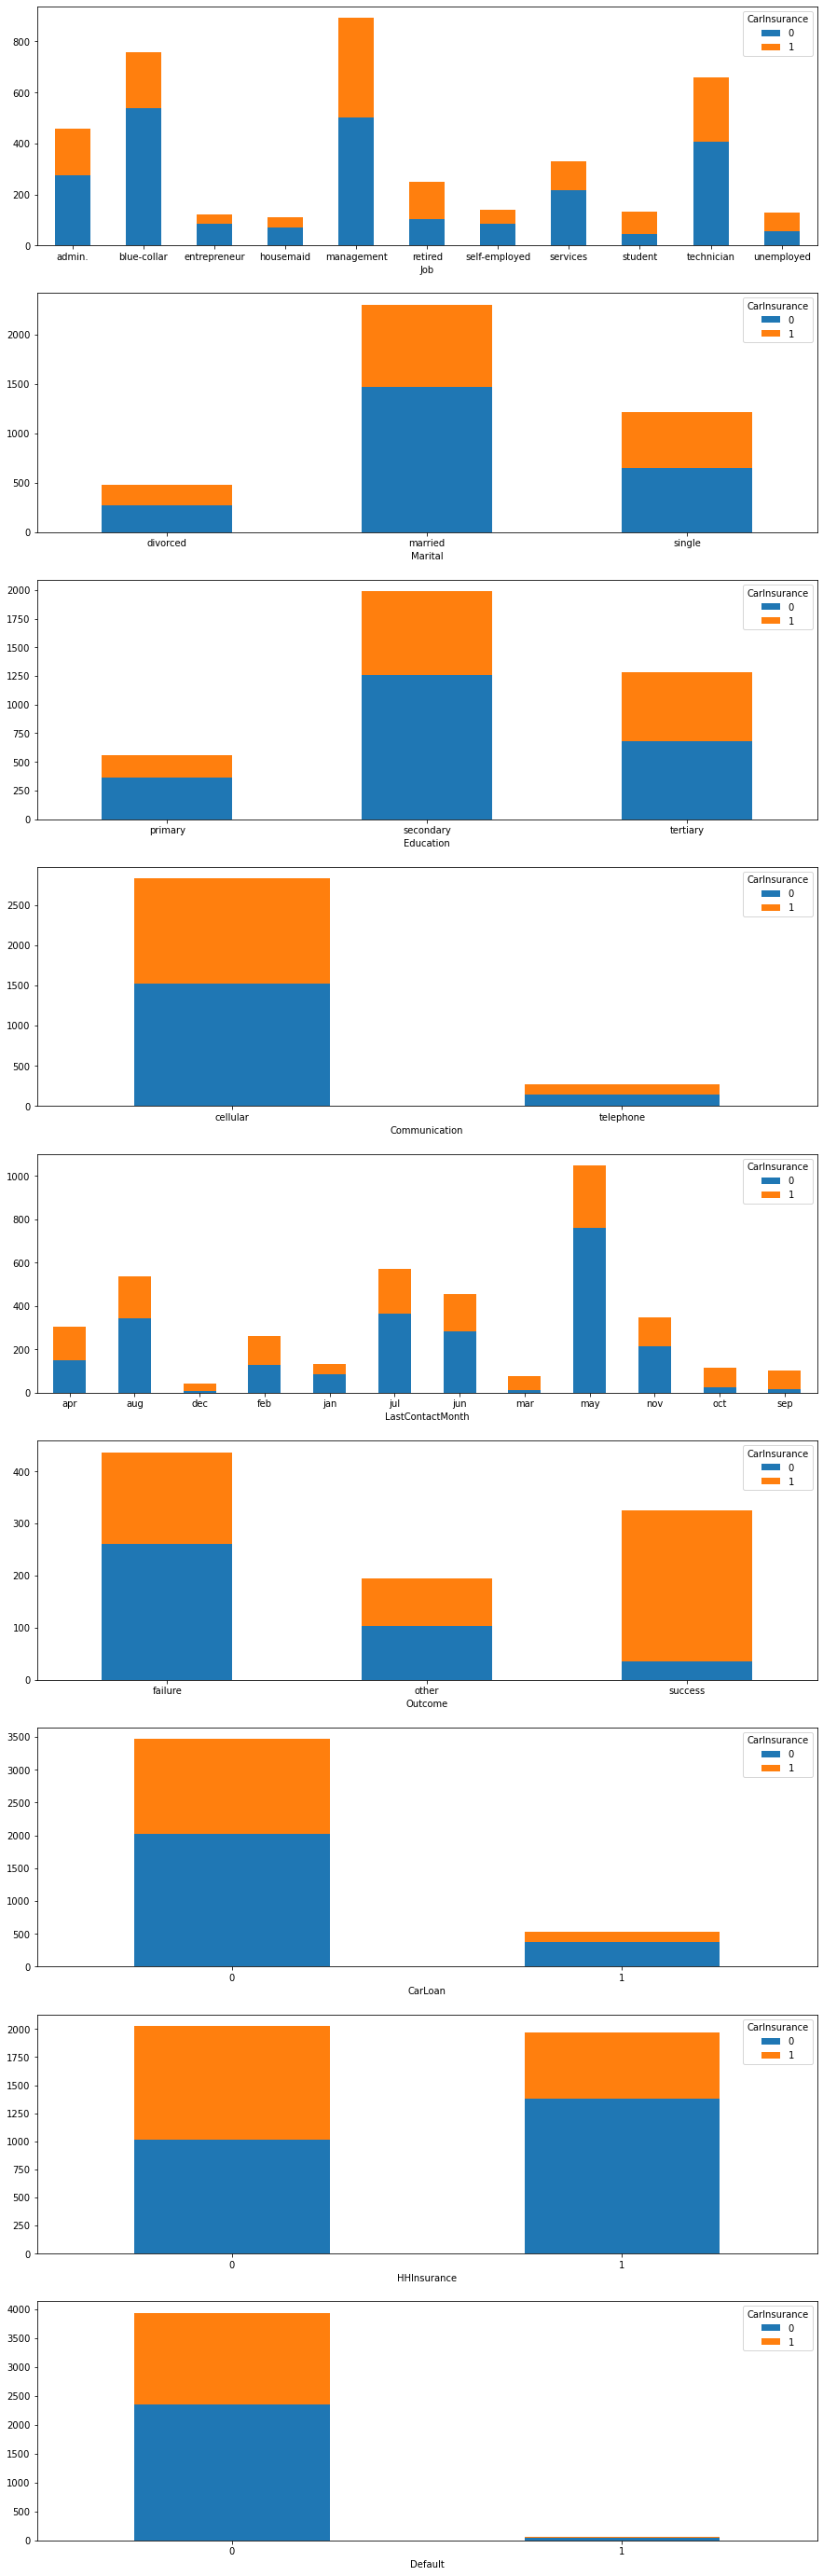

In [17]:
non_num_cols_viz = non_num_cols+['CarLoan', 'HHInsurance', 'Default']
fig, axes = plt.subplots(len(non_num_cols_viz), figsize=(15,50))
for i in range(len(non_num_cols_viz)):
    pd.crosstab(Insurance_Data[non_num_cols_viz[i]], Insurance_Data[Target]).plot(kind='bar', 
                                                                                  stacked=True, 
                                                                                  ax=axes[i],
   # sharex=False every plot should have different axis ax=axes[i],
                                                                                  rot=0)
    # rot =0 is to get label in proper readable format Horizontal
        

* Mar is better in term of Sales with ratio comparision

* May was better in term of Connection with Customer & highest count of sales in a Year

* The JobType='Retired' seem to have higher chance of buying insurance
* The Communication='cellular' seem to best way to reach out for insurance

## Identity & Treatment of Missing Values

In [18]:
Insurance_Data.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

**Looks like variables Job, Education, Communication & Outcome have missing values. Lets analyse them and treat them accordingly**

# Missing Values - Job

In [19]:
Insurance_Data_Org = Insurance_Data.copy()

## Job  

In [20]:
Insurance_Data['Job'].value_counts(dropna=False)

management       893
blue-collar      759
technician       660
admin.           459
services         330
retired          249
self-employed    140
student          131
unemployed       130
entrepreneur     121
housemaid        109
NaN               19
Name: Job, dtype: int64

Lets replace the missing with None. This will help us in handling missing values in future as well.

In [21]:
Insurance_Data['Job'] = Insurance_Data['Job'].fillna('None') # random or others 
Insurance_Data['Job'].isnull().sum()

0

## communication

In [22]:
# Fill missing communication with none 
Insurance_Data['Communication'].value_counts(dropna=False)

cellular     2831
NaN           902
telephone     267
Name: Communication, dtype: int64

In [23]:
Insurance_Data['Communication'] = Insurance_Data['Communication'].fillna('None')
Insurance_Data['Communication'].isnull().sum()

0

## Outcome

In [24]:
# Check for missing value in Outcome
Insurance_Data['Outcome'].value_counts(dropna=False)

NaN        3042
failure     437
success     326
other       195
Name: Outcome, dtype: int64

In [25]:
# Fill missing outcome as not in previous campaign, we are adding one category to Outcome
# We will add category if the value of DaysPassed is -1
# Can you do it other ways.. yes this is one way of doing you can do it other ways also.

Insurance_Data.loc[Insurance_Data['DaysPassed']==-1,'Outcome']='NoPrev'
Insurance_Data['Outcome'].value_counts(dropna=False)


NoPrev     3042
failure     437
success     326
other       195
Name: Outcome, dtype: int64

## Education

In [26]:
Insurance_Data['Job'].value_counts().index

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'student', 'unemployed', 'entrepreneur',
       'housemaid', 'None'],
      dtype='object')

In [27]:
# Create job-education level mode mapping
edu_mode=[]  # empty list 

# What are different Job Types
job_types = Insurance_Data.Job.value_counts().index

# Checking which job is most 
Insurance_Data['Education'].value_counts()

secondary    1988
tertiary     1282
primary       561
Name: Education, dtype: int64

In [28]:
job_types

Index(['management', 'blue-collar', 'technician', 'admin.', 'services',
       'retired', 'self-employed', 'student', 'unemployed', 'entrepreneur',
       'housemaid', 'None'],
      dtype='object')

In [29]:
# Now according to the job type we will crate a mapping where the job and mode of education is there.
# It means when there are many people in the managment job then most of them are in which education.
# We can find that in below mapping


# nlargest(1) select only one level which is highest count level in education 
for i in job_types:
    mode = Insurance_Data[Insurance_Data.Job==i]['Education'].value_counts().nlargest(1).index
    edu_mode = np.append(edu_mode,mode)
edu_map=pd.Series(edu_mode,index=job_types)

edu_map

# basic model calculation

management        tertiary
blue-collar      secondary
technician       secondary
admin.           secondary
services         secondary
retired          secondary
self-employed     tertiary
student          secondary
unemployed       secondary
entrepreneur      tertiary
housemaid          primary
None             secondary
dtype: object

In [30]:
# Fill missing communication with none 
Insurance_Data['Education'].value_counts(dropna=False)

secondary    1988
tertiary     1282
primary       561
NaN           169
Name: Education, dtype: int64

### Replacing with mode

In [31]:
# Apply the mapping to missing eductaion obs. We will replace education now by jobs value
#  for none 
for j in job_types:
    Insurance_Data.loc[(Insurance_Data['Education'].isnull()) & (Insurance_Data['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]

# For those who are not getting mapped we will create a new category as None
Insurance_Data['Education'].fillna('None',inplace=True)

In [32]:
# Fill missing communication with none 
Insurance_Data['Education'].value_counts(dropna=False)

secondary    2117
tertiary     1318
primary       565
Name: Education, dtype: int64

In [33]:
# Check if we have any missing values left
Insurance_Data.isnull().sum()

Id                  0
Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

# Subset of data

* number subset 
* Categorical subset

In [34]:
Insurance_Data_num = Insurance_Data[num_cols+['Id', 'CarInsurance']]
Insurance_Data_num.head(3)

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Id,CarInsurance
0,32,0,1218,1,0,28,2,-1,0,1,0
1,32,0,1156,1,0,26,5,-1,0,2,0
2,29,0,637,1,0,3,1,119,1,3,1


In [35]:
# Categorical columns data
Insurance_Data_cat = Insurance_Data[non_num_cols]
Insurance_Data_cat.head(3)

,Job,Marital,Education,Communication,LastContactMonth,Outcome
0,management,single,tertiary,telephone,jan,NoPrev
1,blue-collar,married,primary,None,may,NoPrev
2,management,single,tertiary,cellular,jun,failure


In [36]:
# Create dummies
Insurance_Data_cat_dummies = pd.get_dummies(Insurance_Data_cat)
print(Insurance_Data_cat_dummies.shape)
Insurance_Data_cat_dummies.head()

(4000, 37)


,Job_None,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


## Merge the 2 File (number & Categorical)

In [37]:
Insurance_Data_final = pd.concat([Insurance_Data_num, Insurance_Data_cat_dummies], axis=1)
print(Insurance_Data_final.shape)
Insurance_Data_final.head()

(4000, 48)


,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Id,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success
0,32,0,1218,1,0,28,2,-1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,32,0,1156,1,0,26,5,-1,0,2,...,0,0,1,0,0,0,1,0,0,0
2,29,0,637,1,0,3,1,119,1,3,...,1,0,0,0,0,0,0,1,0,0
3,25,0,373,1,0,11,2,-1,0,4,...,0,0,1,0,0,0,1,0,0,0
4,30,0,2694,0,0,3,1,-1,0,5,...,1,0,0,0,0,0,1,0,0,0


In [38]:
# Checking if there are missing values before we run model
Insurance_Data_final.isnull().sum(axis = 0)

Age                        0
Default                    0
Balance                    0
HHInsurance                0
CarLoan                    0
LastContactDay             0
NoOfContacts               0
DaysPassed                 0
PrevAttempts               0
Id                         0
CarInsurance               0
Job_None                   0
Job_admin.                 0
Job_blue-collar            0
Job_entrepreneur           0
Job_housemaid              0
Job_management             0
Job_retired                0
Job_self-employed          0
Job_services               0
Job_student                0
Job_technician             0
Job_unemployed             0
Marital_divorced           0
Marital_married            0
Marital_single             0
Education_primary          0
Education_secondary        0
Education_tertiary         0
Communication_None         0
Communication_cellular     0
Communication_telephone    0
LastContactMonth_apr       0
LastContactMonth_aug       0
LastContactMon

## Data Partition

In [39]:
X = Insurance_Data_final.drop(['Id', 'CarInsurance'], axis=1)
Y = Insurance_Data_final['CarInsurance']

#random_state is the seed used by the random number generator. It can be any integer.
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7 , random_state=100)

In [40]:
print('Train shape - ', X_train.shape)
print('Test shape  - ', X_test.shape)

Train shape -  (2800, 46)
Test shape  -  (1200, 46)


## Model Building

from sklearn.linear_model import Ridge
import numpy as np
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RepeatedStratifiedKFold

model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [41]:
from sklearn.linear_model import RidgeClassifier

In [42]:
final_mod = RidgeClassifier(alpha=2) # randomly aplha (lambda) >= 0 

In [43]:
final_mod.fit(X_train, y_train)

RidgeClassifier(alpha=2)

### Coefficent of Model

In [44]:
print(final_mod.intercept_)    # Beta0

[0.04790526]


In [45]:
#final_mod.feature_names_in_

AttributeError: 'RidgeClassifier' object has no attribute 'feature_names_in_'

In [47]:
print(final_mod.coef_)  # Beta1 , Beta2 , Beta3

[[ 2.37472481e-03 -2.23979081e-02 -4.82918585e-07 -2.15294487e-01
  -1.17149463e-01 -2.23257192e-03 -2.04859701e-02  1.00157059e-04
   2.14618583e-02 -1.86516890e-01  3.55043727e-02 -1.58310469e-02
  -1.55924670e-01 -2.12440860e-02 -2.76547129e-02  1.05785470e-01
  -2.10572023e-01  3.86661635e-02  2.36110068e-01  3.37696524e-04
   2.01339659e-01  5.83287780e-02 -1.02046768e-01  4.37179899e-02
  -3.31307087e-02 -4.96510547e-02  8.27817635e-02 -2.98121581e-01
   1.57708102e-01  1.40413479e-01  7.25018989e-02 -3.29242334e-01
   2.74017445e-01 -4.42847654e-02 -3.78132696e-01 -1.85601729e-01
   4.86790384e-02  3.65418730e-01 -1.03355680e-01 -2.90028559e-01
   3.53231042e-01  2.16797609e-01 -8.31272368e-02 -2.55986970e-01
  -1.90908279e-01  5.30022486e-01]]


In [51]:
#coefs = pd.DataFrame(list(final_mod.coef_.ravel()),list(final_mod.feature_names_in_)).reset_index()
#coefs.columns = ['feature', 'coefficient']
#coefs = coefs.sort_values(by='coefficient', ascending=True)
#coefs

## Predictions on Train Dataset

In [52]:
train=pd.concat([X_train,y_train],axis=1)  # Index number
train['Predicted']=final_mod.predict(X_train)
train.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Job_None,...,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success,CarInsurance,Predicted
2471,67,0,1146,0,0,13,1,92,2,0,...,0,1,0,0,0,1,0,0,1,0
2190,35,0,2646,0,0,14,8,183,2,0,...,0,0,0,0,0,0,0,1,1,1
1146,38,0,19,1,0,30,2,-1,0,0,...,1,0,0,0,1,0,0,0,1,0
3355,40,0,35,0,0,3,4,317,3,0,...,0,0,0,0,0,1,0,0,0,0
3926,46,0,57,0,0,28,1,-1,0,0,...,1,0,0,0,1,0,0,0,1,0


## Model Performance Metrics

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Predicted'],train['CarInsurance'])
print(confusion_matrix)

[[1468  597]
 [ 195  540]]


In [54]:
Accuracy_Train=((1468+540)/(2800)*100)
print(Accuracy_Train)

71.71428571428572


In [55]:
print('Classification report for train data is : \n',
      classification_report(train['Predicted'],train['CarInsurance']))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.88      0.71      0.79      2065
           1       0.47      0.73      0.58       735

    accuracy                           0.72      2800
   macro avg       0.68      0.72      0.68      2800
weighted avg       0.78      0.72      0.73      2800



## Predictions on Test Dataset

In [56]:
test=pd.concat([X_test,y_test],axis=1)

In [57]:
test['Predicted']=final_mod.predict(X_test)

## Model Performance Test data

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['CarInsurance'])
print(confusion_matrix)

[[652 236]
 [ 81 231]]


In [59]:
Accuracy_Test=((651+231)/(1200)*100)
print(Accuracy_Test)

73.5


In [60]:
print('Classification report for test data is : \n',
      classification_report(test['Predicted'],test['CarInsurance']))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.89      0.73      0.80       888
           1       0.49      0.74      0.59       312

    accuracy                           0.74      1200
   macro avg       0.69      0.74      0.70      1200
weighted avg       0.79      0.74      0.75      1200



In [63]:
#coefs

# Out of Sample Prediction  - Live Data

In [64]:
# Load the test data
Insurance_test = pd.read_csv(r'C:\Users\SNEHA\Desktop\Machine learning\Ridge and lasso regresssion\carInsurance_Live.csv')
print('Test Data Shape  - ', Insurance_test.shape)
Insurance_test.head()

Test Data Shape  -  (1000, 18)


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd
0,4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17.17.42,17.18.06
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,9.13.44,9.14.37
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15.24.07,15.25.51
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,9.43.44,9.48.01
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16.31.51,16.34.22


# # Handle missing values on the Live data


In [65]:
# The function takes the dataframe and does the same preprocessing that was done for train data

def handle_missing_values(df):
    #Job 
    df['Job'] = df['Job'].fillna('None')
   
    #Communication
    df['Communication'] = df['Communication'].fillna('None')
    
    #Outcome
    df.loc[df['DaysPassed']==-1,'Outcome']='NoPrev'
    
    #Education
    # Apply the mapping to missing eductaion obs. We will replace education now by jobs value
    for j in job_types:
        df.loc[(df['Education'].isnull()) & (df['Job']==j),'Education'] = edu_map.loc[edu_map.index==j][0]

    # For those who are not getting mapped we will create a new category as None
    df['Education'] = df['Education'].fillna('None')
    
    
    return df


In [66]:
Insurance_test_Org = Insurance_test.copy()

In [67]:
Insurance_test.isnull().sum()

Id                    0
Age                   0
Job                   5
Marital               0
Education            47
Default               0
Balance               0
HHInsurance           0
CarLoan               0
Communication       221
LastContactDay        0
LastContactMonth      0
NoOfContacts          0
DaysPassed            0
PrevAttempts          0
Outcome             757
CallStart             0
CallEnd               0
dtype: int64

In [68]:
# Handle the missing values the same we had done for Train
Insurance_test = handle_missing_values(Insurance_test)

In [69]:
Insurance_test.isnull().sum()

Id                  0
Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
dtype: int64

# Converting to Dummies

In [70]:
non_num_cols

['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']

In [71]:
# Convert Categorical to dummies
dummy_cols = pd.get_dummies(Insurance_test[non_num_cols])
dummy_cols.head()

,Job_None,Job_admin.,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [72]:
# Append the columns
new_data = pd.concat([Insurance_test[num_cols], dummy_cols], axis=1)
print(new_data.shape)
new_data.head()

(1000, 46)


,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Job_None,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success
0,25,0,1,1,1,12,12,-1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,40,0,0,1,1,24,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,44,0,-1313,1,1,15,10,-1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,27,0,6279,1,0,9,1,-1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,53,0,7984,1,0,2,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0


# Checking & selecting same number of variable as per the model 

In [73]:
# Save the variables used in the model as it will be required in future for new datasets prediction
final_mod.variables = X_train.columns

In [74]:
# Check if all the variables of train are present in test
# Variables in model
final_mod.variables

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'Job_None', 'Job_admin.',
       'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed', 'Marital_divorced',
       'Marital_married', 'Marital_single', 'Education_primary',
       'Education_secondary', 'Education_tertiary', 'Communication_None',
       'Communication_cellular', 'Communication_telephone',
       'LastContactMonth_apr', 'LastContactMonth_aug', 'LastContactMonth_dec',
       'LastContactMonth_feb', 'LastContactMonth_jan', 'LastContactMonth_jul',
       'LastContactMonth_jun', 'LastContactMonth_mar', 'LastContactMonth_may',
       'LastContactMonth_nov', 'LastContactMonth_oct', 'LastContactMonth_sep',
       'Outcome_NoPrev', 'Outcome_failure', 'Outcome_other',
       'Outcome_success'],
      dtype='object'

In [75]:
# Variables missing in test data. This happens sometimes because of some categories not present in the new data
vars_missing = list(set(final_mod.variables) - set(new_data.columns))
vars_missing

[]

In [76]:
# Create the missing columns in the dataset and fill them with 0
# This will create columns bonly if there are missing values
for i in vars_missing:
    new_data[i] = 0
    
print(new_data.shape)
new_data.head()

(1000, 46)


,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Job_None,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success
0,25,0,1,1,1,12,12,-1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,40,0,0,1,1,24,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,44,0,-1313,1,1,15,10,-1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,27,0,6279,1,0,9,1,-1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,53,0,7984,1,0,2,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [77]:
# Get the new dataset in the same order of the variables used in train
new_data_final = new_data[final_mod.variables]
new_data_final.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Job_None,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success
0,25,0,1,1,1,12,12,-1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,40,0,0,1,1,24,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,44,0,-1313,1,1,15,10,-1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,27,0,6279,1,0,9,1,-1,0,0,...,0,0,0,1,0,0,1,0,0,0
4,53,0,7984,1,0,2,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0


# Prediction on Live data

In [78]:
# Predict on the new data
# predict use b0,b1 and applying on test data 

Insurance_test['Predicted'] = final_mod.predict(new_data_final) 
Insurance_test.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,Predicted
0,4001,25,admin.,single,secondary,0,1,1,1,None,12,may,12,-1,0,NoPrev,17.17.42,17.18.06,0
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NoPrev,9.13.44,9.14.37,0
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NoPrev,15.24.07,15.25.51,0
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NoPrev,9.43.44,9.48.01,0
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NoPrev,16.31.51,16.34.22,0


In [79]:
# Export the results
Insurance_test.to_csv('Predicted_by_irfan.csv', index=False)

#  Lasso Regression

## Model Building

### Data Partition

In [80]:
X = Insurance_Data_final.drop(['Id', 'CarInsurance'], axis=1)
Y = Insurance_Data_final['CarInsurance']

#random_state is the seed used by the random number generator. It can be any integer.
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7 , random_state=100)

In [81]:
print('Train shape - ', X_train.shape)
print('Test shape  - ', X_test.shape)

Train shape -  (2800, 46)
Test shape  -  (1200, 46)


In [82]:
from sklearn.linear_model import LassoCV

In [83]:
Lasso_mod = LassoCV()  #Alpha = Lambda

In [84]:
model=Lasso_mod.fit(X_train, y_train)

from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1,fit_intercept=True)

### Best Alpha value Selected

In [85]:
model.alpha_

0.05149284897959184

### Coefficent of Model

In [86]:
model.coef_  # Beta1, Beta2 , Beta3

array([ 1.51595732e-03, -0.00000000e+00,  3.22304140e-06, -0.00000000e+00,
       -0.00000000e+00, -1.49276916e-03, -1.01117804e-02,  4.00096061e-04,
        1.01435363e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00])

In [87]:
model.intercept_ # Beta0

0.3630135187970019

In [89]:
#model.feature_names_in_

In [90]:
coef2 = pd.DataFrame(list(model.coef_.ravel()),list(model.feature_names_in_)).reset_index()
coef2.columns = ['Variable', 'coefficient']
#coef2 = coef2.sort_values(by='coefficient', ascending=False)
coef2

AttributeError: 'LassoCV' object has no attribute 'feature_names_in_'

## Predictions on Train Dataset

In [91]:
train_lasso=pd.concat([X_train,y_train],axis=1)
train_lasso['Probability']=model.predict(X_train)  # 46
train_lasso.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Job_None,...,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success,CarInsurance,Probability
2471,67,0,1146,0,0,13,1,92,2,0,...,0,1,0,0,0,1,0,0,1,0.49585
2190,35,0,2646,0,0,14,8,183,2,0,...,0,0,0,0,0,0,0,1,1,0.41631
1146,38,0,19,1,0,30,2,-1,0,0,...,1,0,0,0,1,0,0,0,1,0.35527
3355,40,0,35,0,0,3,4,317,3,0,...,0,0,0,0,0,1,0,0,0,0.53610
3926,46,0,57,0,0,28,1,-1,0,0,...,1,0,0,0,1,0,0,0,1,0.38062


In [92]:
train_lasso['Predicted']= np.where(train_lasso['Probability'] >= 0.7,1,0)  #thershold  >0.7
train_lasso.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Job_None,...,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success,CarInsurance,Probability,Predicted
2471,67,0,1146,0,0,13,1,92,2,0,...,1,0,0,0,1,0,0,1,0.49585,0
2190,35,0,2646,0,0,14,8,183,2,0,...,0,0,0,0,0,0,1,1,0.41631,0
1146,38,0,19,1,0,30,2,-1,0,0,...,0,0,0,1,0,0,0,1,0.35527,0
3355,40,0,35,0,0,3,4,317,3,0,...,0,0,0,0,1,0,0,0,0.53610,0
3926,46,0,57,0,0,28,1,-1,0,0,...,0,0,0,1,0,0,0,1,0.38062,0


## Model Performance Metrics

In [95]:
print('Classification report for train data is : \n',
      classification_report(train_lasso['Predicted'],train_lasso['CarInsurance']))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       1.00      0.60      0.75      2791
           1       0.01      0.89      0.01         9

    accuracy                           0.60      2800
   macro avg       0.50      0.74      0.38      2800
weighted avg       1.00      0.60      0.74      2800



## Predictions on Test Dataset

In [96]:
test=pd.concat([X_test,y_test],axis=1)
test['Probability']=model.predict(X_test)
test.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Job_None,...,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success,CarInsurance,Probability
3218,35,0,3168,0,0,22,30,-1,0,0,...,0,0,0,0,1,0,0,0,0,0.08969
883,29,0,723,0,1,17,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,0.37342
367,33,0,647,1,1,4,1,273,1,0,...,0,0,0,0,0,0,1,0,0,0.51841
2226,45,0,3007,0,0,11,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,0.41399
2578,34,0,3404,1,0,8,1,139,5,0,...,0,0,0,0,0,1,0,0,0,0.50980


In [97]:
test['Predicted']=np.where(test['Probability'] >= 0.7,1,0) 
test.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,Job_None,...,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_NoPrev,Outcome_failure,Outcome_other,Outcome_success,CarInsurance,Probability,Predicted
3218,35,0,3168,0,0,22,30,-1,0,0,...,0,0,0,1,0,0,0,0,0.08969,0
883,29,0,723,0,1,17,1,-1,0,0,...,0,0,0,1,0,0,0,0,0.37342,0
367,33,0,647,1,1,4,1,273,1,0,...,0,0,0,0,0,1,0,0,0.51841,0
2226,45,0,3007,0,0,11,1,-1,0,0,...,0,0,0,1,0,0,0,0,0.41399,0
2578,34,0,3404,1,0,8,1,139,5,0,...,0,0,0,0,1,0,0,0,0.50980,0


## Model Performance Test data

In [98]:
print('Classification report for test data is : \n',
      classification_report(test['Predicted'],test['CarInsurance']))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       1.00      0.61      0.76      1196
           1       0.01      0.75      0.01         4

    accuracy                           0.61      1200
   macro avg       0.50      0.68      0.39      1200
weighted avg       1.00      0.61      0.76      1200



# Finished